## A quick note on this dataset: it contains word embeddings from 6 billion tokens of co-occurrence data from Wikipedia and news sources. Words with similar meanings are close together. For example, "red" and "blue" are close because of phrases like "the red bird" and "the blue bird." For technical details, see the original GloVe paper.
## These embeddings are not trained for large language models but are derived from a large corpus using an unsupervised technique. They have similar properties to language model embeddings and are interesting on their own.
## Each line in the file has a word followed by 300 vector components, separated by spaces. We can load it with Python. I'm using the top 10% of the dataset (with //10) for speed and noise reduction. You can adjust this as needed.

In [4]:
import numpy as np

embeddings = {}

file_path = r"C:\Users\HP\Documents\glove.6B.300d.txt"

with open(file_path, "r", encoding='utf-8') as f:
    glove_content = f.read().split('\n')

for i in range(len(glove_content)//10):
    line = glove_content[i].strip().split(' ')
    if line[0] == '':
        continue
    word = line[0]
    embedding = np.array(list(map(float, line[1:])))
    embeddings[word] = embedding

print(len(embeddings))


40000


## There are two main ways to quantify vector similarity: Euclidean distance, the natural Pythagorean distance, and cosine similarity, which measures the cosine of the angle between vectors. Cosine similarity ranges from 1 (identical vectors) to -1 (opposite vectors) to 0 (orthogonal vectors).

In [5]:
def cos_sim(a, b):
    return np.dot(a,b)/(np.linalg.norm(a) * np.linalg.norm(b))
def euc_dist(a, b):
    return np.sum(np.square(a - b)) # no need for square root since we are just ranking distances

## Now we can find all the closest vectors to a given word or embedding vector! We’ll do this in increasing order.

In [6]:
def get_sims(to_word=None, to_e=None, metric=cos_sim):
    # list all similarities to the word to_word, OR the embedding vector to_e
    assert (to_word is not None) ^ (to_e is not None) # find similarity to a word or a vector, not both
    sims = []
    if to_e is None:
        to_e = embeddings[to_word] # get the embedding for the word we are looking at
    for word in embeddings:
        if word == to_word:
            continue
        word_e = embeddings[word]
        sim = metric(word_e, to_e)
        sims.append((sim, word))
    sims.sort()
    return sims

## Now we can write a function to display the 10 most similar words. It will be useful to include a reverse option as well, so we can display the least similar words.

In [7]:
def display_sims(to_word=None, to_e=None, n=10, metric=cos_sim, reverse=False, label=None):
    assert (to_word is not None) ^ (to_e is not None)
    sims = get_sims(to_word=to_word, to_e=to_e, metric=metric)
    display = lambda sim: f'{sim[1]}: {sim[0]:.5f}'
    if label is None:
        label = to_word.upper() if to_word is not None else ''
    print(label) # a heading so we know what these similarities are for
    if reverse:
        sims.reverse()
    for i, sim in enumerate(reversed(sims[-n:])):
        print(i+1, display(sim))
    return sims

## Finally, we can test it!

In [8]:
display_sims(to_word='red')

RED
1 yellow: 0.68288
2 blue: 0.67367
3 pink: 0.58939
4 green: 0.57992
5 white: 0.57338
6 purple: 0.55308
7 black: 0.54414
8 colored: 0.52165
9 sox: 0.52094
10 bright: 0.51195


[(-0.3030874241888925, 'wald'),
 (-0.2418782960945244, 'flannery'),
 (-0.22869172066579438, 'catarina'),
 (-0.2286122796076457, '920'),
 (-0.22460639380468675, 'hahk'),
 (-0.22345997038466148, 'atwater'),
 (-0.2227159210674281, 'paradoxically'),
 (-0.22261944147643303, 'enviable'),
 (-0.22226708938377296, 'sok'),
 (-0.21870487998826793, 'unfaithful'),
 (-0.21759270862182709, 'legislate'),
 (-0.21629094428488715, 'onlytest'),
 (-0.21613878185959276, 'zucker'),
 (-0.2155593871281493, 'godwin'),
 (-0.21253092475493227, 'doran'),
 (-0.2124945329856707, 'divorces'),
 (-0.2120192022189741, 'ica'),
 (-0.21184873651936204, 'illogical'),
 (-0.21051695019440558, 'cj'),
 (-0.2103545950990044, 'nineties'),
 (-0.20845613373213456, '725'),
 (-0.20788890383239234, '1604'),
 (-0.20619130116999423, 'devers'),
 (-0.20398618013551098, 'detriment'),
 (-0.20354021105547815, 'fullest'),
 (-0.20345415945986287, 'affirm'),
 (-0.20343255157797618, 'unimportant'),
 (-0.20335358842410306, 'cementing'),
 (-0.2025


## Looks like the Boston Red Sox made an unexpected appearance here. But other than that, this is about what we would expect.
Maybe we can try some verbs, and not just nouns and adjectives? How about a nice and kind verb like “share”?

In [9]:
display_sims(to_word='share')

SHARE
1 shares: 0.73823
2 stock: 0.60961
3 profit: 0.58674
4 percent: 0.58200
5 shared: 0.56807
6 earnings: 0.55062
7 profits: 0.54955
8 price: 0.54949
9 gain: 0.54468
10 cents: 0.53791


[(-0.26783358537898594, 'lieutenant-general'),
 (-0.25987840564183223, 'bannister'),
 (-0.2359478941550564, 'jodi'),
 (-0.2356825164227646, '1735'),
 (-0.23097180195843806, 'tiring'),
 (-0.22966513609472988, 'sewell'),
 (-0.2290023821271839, '1672'),
 (-0.22767110398768808, 'hitman'),
 (-0.22383534532020585, 'dribbled'),
 (-0.22200326846141583, 'oran'),
 (-0.2218513557648515, 'yost'),
 (-0.22088498593240313, '1611'),
 (-0.21986671765105692, 'understudy'),
 (-0.21959270312336313, 'bronson'),
 (-0.21734114842943666, '1749'),
 (-0.21724538243530678, '1638'),
 (-0.21682257077223802, '1748'),
 (-0.21616588801913889, 'myles'),
 (-0.21601697200780864, 'mcmaster'),
 (-0.21578353546349768, 'valea'),
 (-0.2152956699738182, 'gheorghe'),
 (-0.21483405626302396, '1736'),
 (-0.21386236565050964, 'guenther'),
 (-0.2131728000585752, 'bulbophyllum'),
 (-0.21311051501151465, 'hauser'),
 (-0.21305064868409956, 'grinder'),
 (-0.21212067439686694, 'blanked'),
 (-0.21204453957865002, 'c.c.'),
 (-0.211555384

## We can try some more conventional examples as well:

In [10]:
display_sims(to_word='cat')

CAT
1 dog: 0.68167
2 cats: 0.68158
3 pet: 0.58704
4 dogs: 0.54077
5 feline: 0.48980
6 monkey: 0.48794
7 horse: 0.47321
8 pets: 0.46349
9 rabbit: 0.46088
10 leopard: 0.45855


[(-0.2462503136005794, 'quashed'),
 (-0.24624501222894027, '2016'),
 (-0.24103329542693755, 'coker'),
 (-0.23253994513682438, 'emphasised'),
 (-0.23052056749635197, 'cmc'),
 (-0.22379799652727914, 'paves'),
 (-0.21941402968428866, 'affirming'),
 (-0.21792249928724625, 'sauber'),
 (-0.21592738826426217, 'baathists'),
 (-0.21468160244853512, 'kufa'),
 (-0.21284798231878013, 'upholding'),
 (-0.21180069163016335, 'copley'),
 (-0.21113851525237182, 'mullen'),
 (-0.20939237463366983, 'countering'),
 (-0.2084800098920559, '343'),
 (-0.2062096151445524, 'strata'),
 (-0.20542852405700282, 'underpinning'),
 (-0.20501149391151813, 'disseminating'),
 (-0.20086201083550675, 'choe'),
 (-0.2002025819923106, 'timeframe'),
 (-0.19855025600519166, 'sourcing'),
 (-0.1971646156371286, 'finalize'),
 (-0.19691194114363533, 'impetus'),
 (-0.19627273168362258, 'byers'),
 (-0.19591687528077417, 'dunleavy'),
 (-0.19497792753167587, 'kean'),
 (-0.1945159924498784, 'candidly'),
 (-0.19434575685924463, 'splm'),
 (

In [11]:
display_sims(to_word='frog')

FROG
1 toad: 0.63312
2 frogs: 0.62340
3 snake: 0.48969
4 monkey: 0.48878
5 squirrel: 0.47790
6 species: 0.47647
7 rodent: 0.45832
8 parrot: 0.45636
9 spider: 0.45311
10 rat: 0.44436


[(-0.2578054471479542, 'hardliner'),
 (-0.2164630593991745, 'meir'),
 (-0.21076444046264603, '5.75'),
 (-0.2051306353835242, 'fleury'),
 (-0.20436253807074947, 'toussaint'),
 (-0.204206444148827, 'underwriting'),
 (-0.20417250076074905, 'terrorism'),
 (-0.20406656740192874, 'labour'),
 (-0.20389763789480064, 'khai'),
 (-0.20028920497328212, 'discounted'),
 (-0.1996383526965812, 'labor'),
 (-0.1963053358836142, 'zardari'),
 (-0.19569089592971803, '167'),
 (-0.19524181819848943, 'gurion'),
 (-0.195237454439836, 'momcilo'),
 (-0.1950662917019499, '166'),
 (-0.1941706034659608, 'vojislav'),
 (-0.19087889854887305, 'expiry'),
 (-0.18918615511398376, '179'),
 (-0.1890412641724467, 'implicit'),
 (-0.18901779239667943, 'mariano'),
 (-0.18887657840352656, '252'),
 (-0.1888249159146048, '4.75'),
 (-0.1882986604987277, 'decisively'),
 (-0.18717428810759584, 'nieuwendyk'),
 (-0.18706346537570806, 'rioting'),
 (-0.18696243268384002, 'minister'),
 (-0.18665739378504462, 'biljana'),
 (-0.186566407936

In [12]:
display_sims(to_word='queen')

QUEEN
1 elizabeth: 0.67714
2 princess: 0.63568
3 king: 0.63365
4 monarch: 0.58142
5 royal: 0.54305
6 majesty: 0.53504
7 victoria: 0.52396
8 throne: 0.50971
9 lady: 0.50454
10 crown: 0.49980


[(-0.2522855598212383, 'nakagawa'),
 (-0.25211890631592615, 'alianza'),
 (-0.251116628118367, 'uzbeks'),
 (-0.2498715393221464, 'hahk'),
 (-0.24253731613775587, 'moea'),
 (-0.24093812715440016, 'dt'),
 (-0.23352970030707326, 'outfielders'),
 (-0.23326852642300733, 'feith'),
 (-0.23226530185562524, 'brodsky'),
 (-0.22821177103330065, 'kwah'),
 (-0.2271622705460666, 'workable'),
 (-0.22565017549261168, 'gartner'),
 (-0.22354811491451068, 'kunduz'),
 (-0.22214349932946592, 'lugar'),
 (-0.21928724320214768, 'nix'),
 (-0.21830039649380098, '6-10'),
 (-0.2167990707697053, 'loral'),
 (-0.21536116119549745, 'offsetting'),
 (-0.2153286369725457, 'yomiuri'),
 (-0.21504194986885777, 'uri'),
 (-0.2149580471680095, 'abate'),
 (-0.2137715647401599, 'yabloko'),
 (-0.21265943091402795, 'holdout'),
 (-0.21099137835329163, 'solids'),
 (-0.2103423075059126, 'kimmitt'),
 (-0.21011767067070267, 'euro0'),
 (-0.20998565249226406, 'siegel'),
 (-0.2092223349258989, 'pec'),
 (-0.2090683035653917, 'allgemeine'),

# Reasoning by Analogy
## 
One of the fascinating properties about word embeddings is that analogy is built in using vector math. The example from the GloVe paper is king - queen = man - woman. In other words, rearranging the equation, we expect king = man - woman + queen. Is this true?

In [13]:
display_sims(to_e=embeddings['man'] - embeddings['woman'] + embeddings['queen'], label='king-queen analogy')

king-queen analogy
1 queen: 0.78473
2 king: 0.66354
3 ii: 0.51231
4 majesty: 0.50937
5 monarch: 0.49669
6 prince: 0.49646
7 royal: 0.48113
8 elizabeth: 0.48112
9 vi: 0.45987
10 crown: 0.44824


[(-0.2729085071672871, 'newborns'),
 (-0.24308999394526687, '25.4'),
 (-0.24181278850495647, '29.6'),
 (-0.23778306962374496, '19.4'),
 (-0.2341824907972695, '21.2'),
 (-0.23408195248686134, 'pelvic'),
 (-0.23304716004296616, '28.7'),
 (-0.23268754556689386, '12.9'),
 (-0.2316951494479444, 'nakagawa'),
 (-0.23100912148761304, 'uninsured'),
 (-0.23048138934543871, 'bushehr'),
 (-0.22995448464082047, '17.8'),
 (-0.22851837980152764, '23.6'),
 (-0.2277078796556577, 'abort'),
 (-0.22748520095522984, 'brodsky'),
 (-0.22603625469299063, '35.5'),
 (-0.22598703897136307, 'mandating'),
 (-0.22550341403193763, '20.7'),
 (-0.22309422976271362, 'lega'),
 (-0.22298202206393627, '18.4'),
 (-0.2229241178384742, '19.9'),
 (-0.22290418358964523, '22.5'),
 (-0.2217446180153282, '18.8'),
 (-0.22166280412833758, '20.4'),
 (-0.22100048854816137, 'resale'),
 (-0.22071178690939053, 'osh'),
 (-0.2197325752708678, '27.6'),
 (-0.21970247795381465, 'dataquest'),
 (-0.21970218377711798, '24.9'),
 (-0.219141460591

## Not quite: the closest vector to man - woman + queen turns out to be queen (cosine similarity 0.78), followed somewhat distantly by king (cosine similarity 0.66), we might try aunt and uncle instead:

In [14]:
display_sims(to_e=embeddings['aunt'] - embeddings['woman'] + embeddings['man'], label='aunt-uncle analogy')

aunt-uncle analogy
1 aunt: 0.73477
2 uncle: 0.73438
3 brother: 0.58857
4 grandfather: 0.57512
5 grandmother: 0.55788
6 cousin: 0.55416
7 uncles: 0.54047
8 grandpa: 0.53145
9 dad: 0.52017
10 father: 0.51869


[(-0.25491504089917577, 'accredited'),
 (-0.2376229654749057, 'aia'),
 (-0.22843508154095224, 'trainees'),
 (-0.2164973291471769, 'standardized'),
 (-0.21621622076371624, 'unprotected'),
 (-0.210926706555676, '406'),
 (-0.20872647580573744, 'vetted'),
 (-0.20545084313226847, 'professions'),
 (-0.20460680077137564, 'taluk'),
 (-0.20432846116360182, 'entrants'),
 (-0.2039610130047195, 'laity'),
 (-0.2019901191842703, 'certifications'),
 (-0.20156338707332505, 'australasian'),
 (-0.20141493194532742, 'podlaskie'),
 (-0.2011100542713937, 'nascent'),
 (-0.20011548726978062, 'kuyavian-pomeranian'),
 (-0.19820306344550073, 'lukoil'),
 (-0.19798813142973945, 'minimally'),
 (-0.19574730336907636, 'iaf'),
 (-0.19526497750928992, 'u.s.-japan'),
 (-0.1928511976998089, 'białystok'),
 (-0.19254007093092365, 'normalized'),
 (-0.1916726929142543, 'stipulates'),
 (-0.1915050990775932, 'fetuses'),
 (-0.19147184801802536, 'usable'),
 (-0.1913694879905203, 'slovenian'),
 (-0.19116161414909233, '377'),
 (-

## This is better (cosine similarity 0.7348 vs 0.7344), but still doesn’t work perfectly. But we can try switching to Euclidean distance. Now we need to set reverse=True, because a higher Euclidean distance is actually a lower similarity.

In [15]:
display_sims(to_e=embeddings['aunt'] - embeddings['woman'] + embeddings['man'], metric=euc_dist, reverse=True, label='aunt-uncle analogy')

aunt-uncle analogy
1 uncle: 21.79244
2 aunt: 22.59994
3 grandfather: 33.85182
4 brother: 34.71029
5 cousin: 35.39138
6 grandmother: 37.29864
7 nephew: 37.69684
8 dad: 38.71248
9 grandpa: 38.72332
10 cousins: 39.46817


[(348.9695275910142, 'republish'),
 (327.51875226391735, 'nonsubscribers'),
 (259.56964721850693, 'hushen'),
 (253.96280843213037, 'tael'),
 (253.8984560945909, 'stoxx'),
 (253.1229795239375, 'www.star'),
 (241.16897975639978, '225-issue'),
 (234.57305468816332, 'topix'),
 (233.16032435471573, '100-share'),
 (232.88366320362798, 'resend'),
 (232.57411928001022, '202-383-7824'),
 (229.8561711620039, 'herein'),
 (229.54486464741564, 'non-families'),
 (226.4121954171202, '212-556-4204'),
 (222.68888585484206, '20003'),
 (222.25313516628208, '100.00'),
 (220.13615882262275, 'fdch'),
 (216.55518850806982, 'nikkei-225'),
 (208.38535922424393, 'cac-40'),
 (204.07939394316196, 'baronetage'),
 (203.3265205239017, 'arctiidae'),
 (201.00851485336884, 'advancers'),
 (199.7113991779769, '30-share'),
 (199.32540461136418, 'householder'),
 (196.82980562708858, 'http://www.nytimes.com'),
 (196.63186294300593, 'carniola'),
 (196.59750730675802, 'ibes'),
 (196.35901554545669, 'main-belt'),
 (196.1558409

# Magnitude:
## Cosine similarity focuses on the angles between vectors. But does the magnitude of a vector matter?
## We can measure magnitude as the Euclidean distance from the zero vector. Using our code, let's find the words with the largest and smallest magnitudes.

In [16]:
zero_vec = np.zeros_like(embeddings['the'])
display_sims(to_e=zero_vec, metric=euc_dist, label='largest magnitude')

largest magnitude
1 republish: 294.73192
2 nonsubscribers: 269.25161
3 hushen: 210.33084
4 tael: 203.17237
5 www.star: 200.46580
6 stoxx: 199.07500
7 202-383-7824: 193.53622
8 resend: 189.45098
9 non-families: 185.35839
10 225-issue: 184.80159


[(6.813273269140972, 'likewise'),
 (6.978523511304259, 'lastly'),
 (8.188674991825255, 'interestingly'),
 (8.942613085101687, 'ironically'),
 (9.875138442563319, 'incidentally'),
 (10.06933674422139, 'moreover'),
 (10.353494284020082, 'conversely'),
 (10.397641375684191, 'furthermore'),
 (11.169480755345198, 'aforementioned'),
 (11.761372623186848, 'wherein'),
 (11.862334665069092, 'coincidentally'),
 (11.910045757803617, 'importantly'),
 (12.070682245307122, 'instance'),
 (12.31744562947338, 'presumably'),
 (12.326074478090689, 'outset'),
 (12.487623731286538, 'meantime'),
 (12.57406352109539, 'evidenced'),
 (12.957633352345603, 'consequently'),
 (13.000464457457902, 'nevertheless'),
 (13.00058527774646, 'indeed'),
 (13.28848068574508, 'evidently'),
 (13.330442789781241, 'similarly'),
 (13.451074589864113, 'implying'),
 (13.46122277926648, 'fortunately'),
 (13.53920991314835, 'alluding'),
 (13.571129732595315, 'unfortunately'),
 (13.681367084603025, 'whereupon'),
 (13.916669140630868,

In [17]:
display_sims(to_e=zero_vec, metric=euc_dist, reverse=True, label='smallest magnitude')

smallest magnitude
1 likewise: 6.81327
2 lastly: 6.97852
3 interestingly: 8.18867
4 ironically: 8.94261
5 incidentally: 9.87514
6 moreover: 10.06934
7 conversely: 10.35349
8 furthermore: 10.39764
9 aforementioned: 11.16948
10 wherein: 11.76137


[(294.7319181943669, 'republish'),
 (269.25160660165216, 'nonsubscribers'),
 (210.33083826046578, 'hushen'),
 (203.17237178740615, 'tael'),
 (200.46580105902933, 'www.star'),
 (199.07500125853164, 'stoxx'),
 (193.53621728090832, '202-383-7824'),
 (189.4509849398467, 'resend'),
 (185.35838858707393, 'non-families'),
 (184.80159184555023, '225-issue'),
 (180.01783353693247, '100-share'),
 (179.51015436629737, 'herein'),
 (173.78943492097, 'topix'),
 (168.87171263738634, '212-556-4204'),
 (161.71967288203984, 'baronetage'),
 (160.18967950850538, '100.00'),
 (159.2606091685753, 'nikkei-225'),
 (157.48004933954704, 'colspan'),
 (153.54137189109025, 'arctiidae'),
 (153.49479293840233, '20003'),
 (152.91994351672923, 'carniola'),
 (152.56434892687744, 'fdch'),
 (151.95468432983566, 'cac-40'),
 (151.64072797800438, '30-share'),
 (147.94300236992245, 'cdy'),
 (146.69166505677387, 'householder'),
 (146.314333294412, 'passerine'),
 (144.2596096458159, 'vidhan'),
 (143.4183555492341, 'http://www.n

## It doesn’t look like there’s much of a pattern to the meaning of the large magnitude vectors, but they all seem to have very specific (and sometimes confusing) meanings. On the other hand, the smallest magnitude vectors tend to be very common words that can be found in a variety of contexts.

# 
There’s a huge range between magnitudes: from about 2.6 for the smallest vector all the way to about 17 for the largest. What does this distribution look like? We can plot a histogram to get a better picture of this.

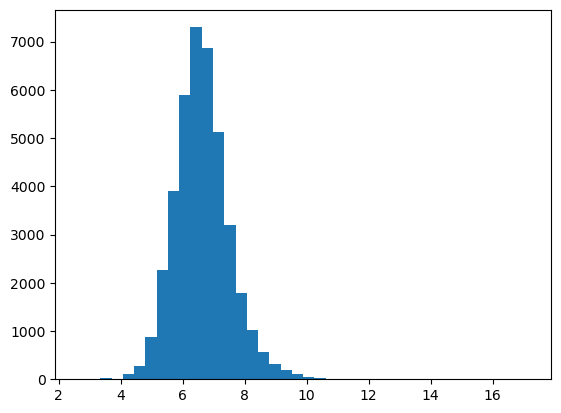

In [19]:
import matplotlib.pyplot as plt

def plot_magnitudes():
    words = [w for w in embeddings]
    magnitude = lambda word: np.linalg.norm(embeddings[word])
    magnitudes = list(map(magnitude, words))
    plt.hist(magnitudes, bins=40)
    plt.show()

plot_magnitudes()

## This distribution looks approximately normal. If we wanted to test this further, we could use a Q-Q plot. But for our purposes right now, this is fine.

## Vector embeddings can encode concepts in directions and subspaces, often with biases. A study examined this for gender bias.

## We can replicate this with GloVe embeddings. First, find the "masculinity" direction by averaging differences between vectors like "he" and "she" or "man" and "woman".

In [20]:
gender_pairs = [('man', 'woman'), ('men', 'women'), ('brother', 'sister'), ('he', 'she'),
                    ('uncle', 'aunt'), ('grandfather', 'grandmother'), ('boy', 'girl'),
                    ('son', 'daughter')]
masc_v = zero_vec
for pair in gender_pairs:
    masc_v += embeddings[pair[0]]
    masc_v -= embeddings[pair[1]]

## Now we can find the “most masculine” and “most feminine” vectors, as judged by the embedding space.

In [21]:
display_sims(to_e=masc_v, metric=cos_sim, label='masculine vecs')

masculine vecs
1 brother: 0.34887
2 colonel: 0.30188
3 himself: 0.28909
4 uncle: 0.28338
5 gen.: 0.27519
6 nephew: 0.27391
7 brig.: 0.27070
8 brothers: 0.26828
9 son: 0.26798
10 sir: 0.25837


[(-0.45034944733993565, 'actress'),
 (-0.42113751974930863, 'herself'),
 (-0.4182897715800978, 'businesswoman'),
 (-0.4095360321768028, 'chairwoman'),
 (-0.4040097068113766, 'pregnant'),
 (-0.40207326860164694, 'she'),
 (-0.39849637710253566, 'her'),
 (-0.39446867662194657, 'sister'),
 (-0.3941596161441774, 'actresses'),
 (-0.3910394024285613, 'woman'),
 (-0.3908591972930811, 'spokeswoman'),
 (-0.3834326302842507, 'congresswoman'),
 (-0.3827856994811566, 'feminist'),
 (-0.38271794801084524, 'mother'),
 (-0.377085082291381, 'diva'),
 (-0.37343460295024844, 'ann'),
 (-0.36903703649831765, 'aunt'),
 (-0.3689521708375567, 'ms.'),
 (-0.36864107143346947, 'ballerina'),
 (-0.36743559171154294, 'women'),
 (-0.3643568611585269, 'pregnancy'),
 (-0.36219660005146137, 'ellen'),
 (-0.36188132721890565, 'louise'),
 (-0.3613187134943022, 'michelle'),
 (-0.358964753425607, 'frenchwoman'),
 (-0.3544389363799514, 'kournikova'),
 (-0.35335805294725847, 'marie'),
 (-0.35316286847579464, 'grandmother'),
 (

In [22]:
display_sims(to_e=masc_v, metric=cos_sim, reverse=True, label='feminine vecs')

feminine vecs
1 actress: -0.45035
2 herself: -0.42114
3 businesswoman: -0.41829
4 chairwoman: -0.40954
5 pregnant: -0.40401
6 she: -0.40207
7 her: -0.39850
8 sister: -0.39447
9 actresses: -0.39416
10 woman: -0.39104


[(0.3488724207967687, 'brother'),
 (0.30187873725499703, 'colonel'),
 (0.2890924902714294, 'himself'),
 (0.28337513749912285, 'uncle'),
 (0.27519345835280423, 'gen.'),
 (0.27390575028865105, 'nephew'),
 (0.2707034797487814, 'brig.'),
 (0.2682788291018056, 'brothers'),
 (0.26798356439330095, 'son'),
 (0.25836740470457137, 'sir'),
 (0.2508668109363949, 'brigadier'),
 (0.24665331010279795, 'succeeded'),
 (0.24654206541647708, 'john'),
 (0.24525844859196247, 'sr.'),
 (0.24230363201245525, 'hero'),
 (0.24191848671757202, 'jr.'),
 (0.2411637872090411, 'his'),
 (0.23908038780786545, 'spokesman'),
 (0.23793970785188306, 'businessman'),
 (0.2377312278418836, 'commanded'),
 (0.23734745878487035, 'mercenaries'),
 (0.23553796388705264, 'lieutenant-general'),
 (0.23489901929252519, 'punter'),
 (0.2339957735921282, 'man'),
 (0.23003661437803188, 'great-grandson'),
 (0.22983344480070939, 'son-in-law'),
 (0.22968118872315604, 'col.'),
 (0.22895137097970483, 'lieutenants'),
 (0.22865713789647243, 'chie

## Now, we can run an easy test to detect bias in the dataset: compute the similarity between nurse and each of man and woman. Theoretically, these should be about equal: nurse is not a gendered word. Is this true?

In [23]:
print("nurse - man", cos_sim(embeddings['nurse'], embeddings['man'])) 
print("nurse - woman", cos_sim(embeddings['nurse'], embeddings['woman']))

nurse - man 0.2373002960838575
nurse - woman 0.4496356687591033


## That’s a pretty big difference! (Remember cosine similarity runs from -1 to 1, with positive associations in the range 0 to 1.) For reference, 0.45 is also close to the cosine similarity between cat and leopard.

# Clustering ## 
Let’s see if we can cluster words with similar meaning using k-means clustering. This is easy to do with the package scikit-learn. We are going to use 300 clusters, which sounds like a lot, but trust me: almost all of the clusters are so interesting, you could write an entire article just interpreting them!

In [24]:
from sklearn.cluster import KMeans

def get_kmeans(n=300):
    kmeans = KMeans(n_clusters=n, n_init=1)
    X = np.array([embeddings[w] for w in embeddings])
    kmeans.fit(X)
    return kmeans

def display_kmeans(kmeans):
    # print all clusters and 5 associated words for each
    words = np.array([w for w in embeddings])
    X = np.array([embeddings[w] for w in embeddings])
    y = kmeans.predict(X) # get the cluster for each word
    for cluster in range(kmeans.cluster_centers_.shape[0]):
        print(f'KMeans {cluster}')
        cluster_words = words[y == cluster] # get all words in each cluster
        for i, w in enumerate(cluster_words[:5]):
            print(i+1, w)

kmeans = get_kmeans()
display_kmeans(kmeans)

KMeans 0
1 hostage
2 hostages
3 freed
4 kidnapped
5 kidnapping
KMeans 1
1 store
2 stores
3 brand
4 fashion
5 chain
KMeans 2
1 eyes
2 skin
3 mouth
4 nose
5 dirty
KMeans 3
1 totally
2 deemed
3 unfair
4 unacceptable
5 excuse
KMeans 4
1 "
2 ''
3 ``
4 not
5 i
KMeans 5
1 card
2 cards
3 ticket
4 tickets
5 gift
KMeans 6
1 emerging
2 hub
3 dominate
4 monopoly
5 silicon
KMeans 7
1 %
2 1.5
3 2.5
4 1.2
5 1.3
KMeans 8
1 senate
2 sen.
3 r
4 d
5 mccain
KMeans 9
1 200
2 500
3 300
4 1,000
5 400
KMeans 10
1 union
2 workers
3 labor
4 strike
5 employees
KMeans 11
1 outnumbered
2 u.
3 advancers
4 212
5 207
KMeans 12
1 park
2 hotel
3 square
4 beach
5 downtown
KMeans 13
1 floor
2 stone
3 walls
4 window
5 concrete
KMeans 14
1 baronet
2 ca.
3 knighted
4 1660
5 1650
KMeans 15
1 revolution
2 radical
3 secular
4 propaganda
5 rhetoric
KMeans 16
1 justices
2 o'connor
3 dissent
4 sandra
5 clarence
KMeans 17
1 religious
2 god
3 faith
4 religion
5 tradition
KMeans 18
1 destroy
2 regain
3 transform
4 communicate
5 alte

## There’s a lot to look at here. We have clusters for things as diverse as New York City (manhattan, n.y., brooklyn, hudson, borough), molecular biology (protein, proteins, enzyme, beta, molecules), and Indian names (singh, ram, gandhi, kumar, rao).
## 
But sometimes these clusters are not what they seem. Let’s write code to display all words of a cluster containing a given word, along with the nearest and farthest cluster.

In [25]:
def get_kmeans_cluster(kmeans, word=None, cluster=None):
    # given a word, find the cluster of that word. (or start with a cluster index.)
    # then, get all words of that cluster.
    assert (word is None) ^ (cluster is None)
    if cluster is None:
        cluster = kmeans.predict([embeddings[word]])[0]
    words = np.array([w for w in embeddings])
    X = np.array([embeddings[w] for w in embeddings])
    y = kmeans.predict(X)
    cluster_words = words[y == cluster]
    return cluster, cluster_words

def display_cluster(kmeans, word):
    cluster, cluster_words = get_kmeans_cluster(kmeans, word=word)
    # print all words in the cluster
    print(f"Full KMeans ({word}, cluster {cluster})")
    for i, w in enumerate(cluster_words):
        print(i+1, w)
    # rank all clusters (excluding this one) by Euclidean distance of their centers from this cluster's center
    distances = np.concatenate([kmeans.cluster_centers_[:cluster], kmeans.cluster_centers_[cluster+1:]], axis=0)
    distances = np.sum(np.square(distances - kmeans.cluster_centers_[cluster]), axis=1)
    nearest = np.argmin(distances, axis=0)
    _, nearest_words = get_kmeans_cluster(kmeans, cluster=nearest)
    print(f"Nearest cluster: {nearest}")
    for i, w in enumerate(nearest_words[:5]):
        print(i+1, w)
    farthest = np.argmax(distances, axis=0)
    print(f"Farthest cluster: {farthest}")
    _, farthest_words = get_kmeans_cluster(kmeans, cluster=farthest)
    for i, w in enumerate(farthest_words[:5]):
        print(i+1, w)

In [26]:
display_cluster(kmeans, 'animal')

Full KMeans (animal, cluster 80)
1 wild
2 animals
3 bird
4 animal
5 dog
6 bear
7 tiger
8 dogs
9 hunt
10 hunting
11 wildlife
12 bears
13 cat
14 zoo
15 eagle
16 bull
17 wolf
18 endangered
19 cow
20 lion
21 pet
22 feeding
23 breeding
24 sheep
25 mouse
26 cats
27 duck
28 deer
29 breed
30 whale
31 elephant
32 snake
33 hunters
34 pigs
35 pig
36 exotic
37 shark
38 wolves
39 crane
40 chickens
41 whales
42 cows
43 rat
44 elephants
45 swan
46 monkey
47 pets
48 seals
49 rats
50 extinction
51 rabbit
52 crow
53 cod
54 trout
55 flock
56 monkeys
57 dove
58 herd
59 goat
60 slaughtered
61 turtle
62 stray
63 mammoth
64 panda
65 hunted
66 mosquito
67 goose
68 breeds
69 goats
70 bald
71 predator
72 camel
73 moose
74 siberian
75 dolphin
76 skins
77 migratory
78 cranes
79 elk
80 pandas
81 owl
82 pony
83 leopard
84 hog
85 hare
86 crocodile
87 roaming
88 cloned
89 mole
90 pigeon
91 chicks
92 migrate
93 donkey
94 cub
95 tick
96 herds
97 roam
98 owls
99 rabbits
100 gorilla
101 winged
102 perch
103 sightings
104

In [27]:
display_cluster(kmeans, 'dog')

Full KMeans (dog, cluster 80)
1 wild
2 animals
3 bird
4 animal
5 dog
6 bear
7 tiger
8 dogs
9 hunt
10 hunting
11 wildlife
12 bears
13 cat
14 zoo
15 eagle
16 bull
17 wolf
18 endangered
19 cow
20 lion
21 pet
22 feeding
23 breeding
24 sheep
25 mouse
26 cats
27 duck
28 deer
29 breed
30 whale
31 elephant
32 snake
33 hunters
34 pigs
35 pig
36 exotic
37 shark
38 wolves
39 crane
40 chickens
41 whales
42 cows
43 rat
44 elephants
45 swan
46 monkey
47 pets
48 seals
49 rats
50 extinction
51 rabbit
52 crow
53 cod
54 trout
55 flock
56 monkeys
57 dove
58 herd
59 goat
60 slaughtered
61 turtle
62 stray
63 mammoth
64 panda
65 hunted
66 mosquito
67 goose
68 breeds
69 goats
70 bald
71 predator
72 camel
73 moose
74 siberian
75 dolphin
76 skins
77 migratory
78 cranes
79 elk
80 pandas
81 owl
82 pony
83 leopard
84 hog
85 hare
86 crocodile
87 roaming
88 cloned
89 mole
90 pigeon
91 chicks
92 migrate
93 donkey
94 cub
95 tick
96 herds
97 roam
98 owls
99 rabbits
100 gorilla
101 winged
102 perch
103 sightings
104 ge

In [28]:
display_cluster(kmeans, 'birds')

Full KMeans (birds, cluster 62)
1 species
2 birds
3 genus
4 endemic
5 moth
6 fossil
7 creatures
8 extinct
9 insects
10 prey
11 nest
12 predators
13 snail
14 mammals
15 larvae
16 specimens
17 gastropod
18 frog
19 beetle
20 feeds
21 dinosaur
22 aquatic
23 snakes
24 mollusk
25 terrestrial
26 snails
27 subspecies
28 genera
29 insect
30 dinosaurs
31 frogs
32 turtles
33 fauna
34 bees
35 specimen
36 dwarf
37 moths
38 worm
39 worms
40 subfamily
41 algae
42 taxonomy
43 ants
44 fungi
45 butterflies
46 orchid
47 mosquitoes
48 fungus
49 beetles
50 ant
51 nests
52 spiders
53 mating
54 lizard
55 reptiles
56 predatory
57 nesting
58 crabs
59 mammal
60 catfish
61 parasite
62 pests
63 eel
64 rodents
65 parasites
66 primates
67 primate
68 infect
69 fishes
70 squid
71 homo
72 noctuidae
73 lizards
74 iucn
75 geometridae
76 nocturnal
77 wasp
78 medium-sized
79 shellfish
80 crocodiles
81 orchids
82 rodent
83 parasitic
84 eels
85 clams
86 nectar
87 mussels
88 invertebrates
89 reptile
90 mollusks
91 amphibians

In [29]:
display_cluster(kmeans, 'bird')

Full KMeans (bird, cluster 80)
1 wild
2 animals
3 bird
4 animal
5 dog
6 bear
7 tiger
8 dogs
9 hunt
10 hunting
11 wildlife
12 bears
13 cat
14 zoo
15 eagle
16 bull
17 wolf
18 endangered
19 cow
20 lion
21 pet
22 feeding
23 breeding
24 sheep
25 mouse
26 cats
27 duck
28 deer
29 breed
30 whale
31 elephant
32 snake
33 hunters
34 pigs
35 pig
36 exotic
37 shark
38 wolves
39 crane
40 chickens
41 whales
42 cows
43 rat
44 elephants
45 swan
46 monkey
47 pets
48 seals
49 rats
50 extinction
51 rabbit
52 crow
53 cod
54 trout
55 flock
56 monkeys
57 dove
58 herd
59 goat
60 slaughtered
61 turtle
62 stray
63 mammoth
64 panda
65 hunted
66 mosquito
67 goose
68 breeds
69 goats
70 bald
71 predator
72 camel
73 moose
74 siberian
75 dolphin
76 skins
77 migratory
78 cranes
79 elk
80 pandas
81 owl
82 pony
83 leopard
84 hog
85 hare
86 crocodile
87 roaming
88 cloned
89 mole
90 pigeon
91 chicks
92 migrate
93 donkey
94 cub
95 tick
96 herds
97 roam
98 owls
99 rabbits
100 gorilla
101 winged
102 perch
103 sightings
104 g

## You might not get exactly this result every time: the clustering algorithm is non-deterministic. But much of the time, “birds” is associated with disease words rather than animal words. It seems the original dataset tends to use the word “bird” in the context of disease vectors.

# Principal Component Analysis
## Principal Component Analysis (PCA) is a tool we can use to find the directions in vector space associated with the most variance in our dataset. Let’s try it. Like clustering, sklearn makes this easy.

In [30]:
from sklearn.decomposition import PCA

def get_pca_vecs(n=10): # get the first 10 principal components
    pca = PCA()
    X = np.array([embeddings[w] for w in embeddings])
    pca.fit(X)
    principal_components = list(pca.components_[:n, :])
    return pca, principal_components

pca, pca_vecs = get_pca_vecs()
for i, vec in enumerate(pca_vecs):
    # display the words with the highest and lowest values for each principal component
    display_sims(to_e=vec, metric=cos_sim, label=f'PCA {i+1}')
    display_sims(to_e=vec, metric=cos_sim, label=f'PCA {i+1} negative', reverse=True)

PCA 1
1 rather: 0.72731
2 even: 0.69019
3 those: 0.68833
4 because: 0.68744
5 these: 0.68105
6 should: 0.67500
7 indeed: 0.67015
8 more: 0.66690
9 that: 0.66293
10 though: 0.66171
PCA 1 negative
1 mahd: -0.38215
2 jeanette: -0.37562
3 lindley: -0.37310
4 yahd: -0.35863
5 sheh: -0.35589
6 stahn: -0.35563
7 zak: -0.35014
8 mabel: -0.34488
9 pehr: -0.34439
10 hahk: -0.34319
PCA 2
1 james: 0.56657
2 smith: 0.56480
3 wilson: 0.56134
4 brother: 0.55521
5 miller: 0.55320
6 john: 0.55033
7 robinson: 0.54274
8 thomas: 0.54251
9 j.: 0.54140
10 anderson: 0.53922
PCA 2 negative
1 mixtures: -0.43485
2 optimized: -0.41939
3 decreases: -0.40956
4 negligible: -0.39962
5 resultant: -0.39868
6 usable: -0.39614
7 constituting: -0.39581
8 decreasing: -0.39422
9 densities: -0.39336
10 localized: -0.38603
PCA 3
1 1.8: 0.57993
2 1.6: 0.57851
3 1.2: 0.57841
4 1.4: 0.57294
5 2.3: 0.57019
6 2.6: 0.56993
7 2.8: 0.56966
8 3.7: 0.56660
9 1.9: 0.56424
10 2.2: 0.56063
PCA 3 negative
1 misunderstood: -0.41172
2 mocki

### It looks like positive values for component 9 are associated with Middle Eastern, South Asian and Southeast Asian terms, while negative values are associated with North American and British terms.
### 
Another interesting one is component 3. All the positive terms are decimal numbers, apparently quite a salient feature for this model. Component 8 also shows a similar pattern.

# Dimensionality Reduction## 
One of the main benefits of PCA is that it allows us to take a very high-dimensional dataset (300-dimensional in this case) and plot it in just two or three dimensions by projecting onto the first components. Let’s try a two-dimensional plot and see if there is any information we can gather from it. We’ll also include color-coding by cluster using k-means.

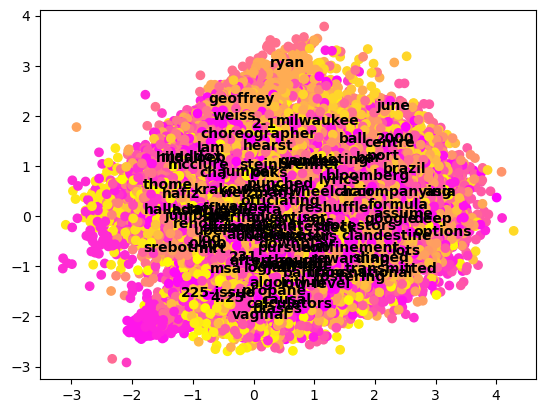

In [31]:
def plot_pca(pca_vecs, kmeans):
    words = [w for w in embeddings]
    x_vec = pca_vecs[0]
    y_vec = pca_vecs[1]
    X = np.array([np.dot(x_vec, embeddings[w]) for w in words])
    Y = np.array([np.dot(y_vec, embeddings[w]) for w in words])
    colors =  kmeans.predict([embeddings[w] for w in words])
    plt.scatter(X, Y, c=colors, cmap='spring') # color by cluster
    for i in np.random.choice(len(words), size=100, replace=False):
        # annotate 100 randomly selected words on the graph
        plt.annotate(words[i], (X[i], Y[i]), weight='bold')
    plt.show()

plot_pca(pca_vecs, kmeans)

## This plot is hard to interpret with just two of 300 dimensions. Names cluster at the top, while decimal numbers stand out at the bottom left.

# Covariance## 
It is often helpful to get an idea of the covariance between input features. In this case, our input features are just abstract vector directions that are difficult to interpret. Still, a covariance matrix can tell us how much of this information is actually being used. If we see high covariance, it means some dimensions are strongly correlated, and maybe we could get away with reducing the dimensionality a little bit.

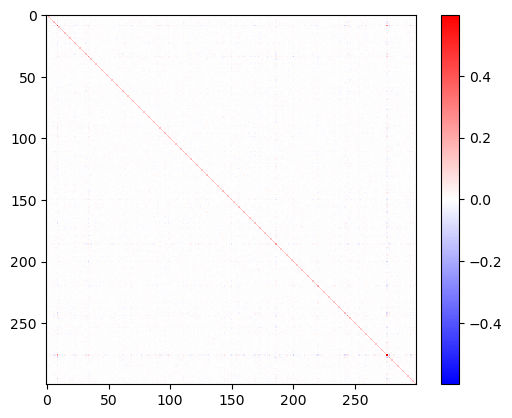

In [32]:
def display_covariance():
    X = np.array([embeddings[w] for w in embeddings]).T # rows are variables (components), columns are observations (words)
    cov = np.cov(X)
    cov_range = np.maximum(np.max(cov), np.abs(np.min(cov))) # make sure the colorbar is balanced, with 0 in the middle
    plt.imshow(cov, cmap='bwr', interpolation='nearest', vmin=-cov_range, vmax=cov_range)
    plt.colorbar()
    plt.show()

display_covariance()

In [34]:
e9 = np.zeros_like(zero_vec)
e9[9] = 1.0
e276 = np.zeros_like(zero_vec)
e276[276] = 1.0
display_sims(to_e=e9, metric=cos_sim, label='e9')

e9
1 grizzlies: 0.28381
2 supersonics: 0.27530
3 notables: 0.27420
4 posey: 0.26918
5 bobcats: 0.26468
6 wannabe: 0.25975
7 hoosiers: 0.25793
8 fiddler: 0.25790
9 overton: 0.25305
10 jayhawks: 0.24637


[(-0.4887027797507394, 'therefore'),
 (-0.463645865306233, 'that'),
 (-0.44001227930313436, 'it'),
 (-0.4392160837980655, 'which'),
 (-0.43769447454658633, 'government'),
 (-0.4352918829703236, 'because'),
 (-0.4349207450824795, 'moreover'),
 (-0.4348362080732151, 'fact'),
 (-0.42863960243905175, 'thus'),
 (-0.42742504660628694, 'very'),
 (-0.42399537960711675, 'should'),
 (-0.4221530376247981, 'using'),
 (-0.4217717238113079, 'situation'),
 (-0.4207706439607401, 'not'),
 (-0.420389397476856, 'rather'),
 (-0.41975723861062625, 'so'),
 (-0.4186201152358556, 'well'),
 (-0.4172532796417142, 'however'),
 (-0.41715289228053776, 'indeed'),
 (-0.416824133865797, 'particular'),
 (-0.41583308827119275, 'cannot'),
 (-0.41492095179446276, 'result'),
 (-0.41486675117429894, 'actually'),
 (-0.4142946417924425, 'environment'),
 (-0.41344554179450654, 'better'),
 (-0.4106413759892262, 'policy'),
 (-0.4103654416997406, 'intelligence'),
 (-0.410356006339115, 'clear'),
 (-0.4096328570095473, 'much'),
 (

In [35]:
display_sims(to_e=e276, metric=cos_sim, label='e276')

e276
1 pehr: 0.26677
2 zetsche: 0.25771
3 steadied: 0.25173
4 202-887-8307: 0.25127
5 bernice: 0.24727
6 goldie: 0.24419
7 edelman: 0.23865
8 kr: 0.23671
9 jg: 0.23452
10 lib: 0.23386


[(-0.5268029776667902, 'they'),
 (-0.524656388443704, 'instead'),
 (-0.5245726422194305, 'those'),
 (-0.5239038707171483, 'hundreds'),
 (-0.5145108748341695, 'addition'),
 (-0.5104070547733266, 'dozens'),
 (-0.5103485801245894, 'others'),
 (-0.5101571074112444, 'dozen'),
 (-0.506267907521101, 'only'),
 (-0.5062398997009165, 'outside'),
 (-0.5037405461834187, 'without'),
 (-0.49796496133513535, 'allow'),
 (-0.4970839345291995, 'other'),
 (-0.4936527523942193, 'use'),
 (-0.4905638708884233, 'few'),
 (-0.4904721147781063, 'them'),
 (-0.49033214361120764, 'thousands'),
 (-0.48893409862786097, 'many'),
 (-0.4883402472620981, 'even'),
 (-0.484331336797484, 'should'),
 (-0.48379717857361876, 'come'),
 (-0.48345117491262685, 'several'),
 (-0.48196977866001006, 'not'),
 (-0.48107528779005393, 'stop'),
 (-0.4799707027826789, 'one'),
 (-0.47855001581098444, 'meant'),
 (-0.4746290583106738, 'residents'),
 (-0.47338133245165465, 'would'),
 (-0.47323246901372756, 'could'),
 (-0.472014603404976, 'bec

## The initial results were unusual and lacked meaningful insights. However, positive covariance can occur if words with strongly negative values in one component also have strongly negative values in another. By exploring this reversed similarity, we aim to gain deeper understanding from the data.

In [36]:
display_sims(to_e=e9, metric=cos_sim, label='e9', reverse=True)

e9
1 therefore: -0.48870
2 that: -0.46365
3 it: -0.44001
4 which: -0.43922
5 government: -0.43769
6 because: -0.43529
7 moreover: -0.43492
8 fact: -0.43484
9 thus: -0.42864
10 very: -0.42743


[(0.2838103276452216, 'grizzlies'),
 (0.27529791805229553, 'supersonics'),
 (0.274195224030048, 'notables'),
 (0.2691762685190744, 'posey'),
 (0.26468471136283817, 'bobcats'),
 (0.25975429058555516, 'wannabe'),
 (0.2579285835866386, 'hoosiers'),
 (0.257900487877238, 'fiddler'),
 (0.25304503805380385, 'overton'),
 (0.2463716376798515, 'jayhawks'),
 (0.24461730908941073, 'bucks'),
 (0.2417355733923066, 'cavaliers'),
 (0.23711246181283407, 'gilliam'),
 (0.23625843885700762, '76ers'),
 (0.23469721347320324, 'jermaine'),
 (0.23463444801181857, 'devin'),
 (0.23390589999202735, 'scuffled'),
 (0.23195427582505335, 'pacers'),
 (0.23091836425887588, 'jeffries'),
 (0.2305402686790067, 'year-old'),
 (0.23033282697136157, 'rookies'),
 (0.23021896657960192, 'blazers'),
 (0.2297311620636286, 'famers'),
 (0.2294498933452148, 'outlasted'),
 (0.2290540057112585, 'dunleavy'),
 (0.2289652394059476, 'inductees'),
 (0.2284948732161892, 'cavs'),
 (0.22809653441799307, 'keyboardist'),
 (0.2260996795754002, 'k

In [37]:
display_sims(to_e=e276, metric=cos_sim, label='e276', reverse=True)

e276
1 they: -0.52680
2 instead: -0.52466
3 those: -0.52457
4 hundreds: -0.52390
5 addition: -0.51451
6 dozens: -0.51041
7 others: -0.51035
8 dozen: -0.51016
9 only: -0.50627
10 outside: -0.50624


[(0.26677251813572606, 'pehr'),
 (0.2577147383095884, 'zetsche'),
 (0.2517318086739537, 'steadied'),
 (0.2512679910840628, '202-887-8307'),
 (0.24727364600216548, 'bernice'),
 (0.24418596828106304, 'goldie'),
 (0.23865308009594924, 'edelman'),
 (0.2367074570813082, 'kr'),
 (0.23452284216910696, 'jg'),
 (0.23385580988186946, 'lib'),
 (0.23363092409694716, 'fiorina'),
 (0.23249972979625316, 'cbe'),
 (0.23156196469788415, 'pierson'),
 (0.23081476112643085, 'parf'),
 (0.228258089142761, 'reinhard'),
 (0.22704699538655213, 'bankboston'),
 (0.22694940675077144, 'sheh'),
 (0.22648299700105445, 'zuh'),
 (0.22465479103106478, 'eg'),
 (0.22417304368005442, 'colette'),
 (0.2231567181256184, 'rn'),
 (0.2228280311431194, 'qc'),
 (0.22187404989768056, 'mcginley'),
 (0.22155838277781503, 'ahm'),
 (0.21975879909703538, 'celeste'),
 (0.21974100112918735, 'mbe'),
 (0.2191307326890245, 'aj'),
 (0.2187639446357466, 'lieutenant-general'),
 (0.2178827119018907, 'regan'),
 (0.21707018131101513, 'schrempp'),
